In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
# Loading your IBM Q account(s)

## Example: Find the data from qRAM
Prepare a qRAM of $n$-addresses in which the numbers $k_0, k_1, .. , k_{n-1}$ are stored in this order.  
Find the address in which the number $m$ is stored using Grover's algorithm.  
- $n = 4$
- $k = [1,2,5,7]$
- $m = 5$

### qRAM operation.
Here we show a circuit example of qRAM.

In [2]:
def execute_circuit(circuit):
    backend = Aer.get_backend('qasm_simulator')
    job = execute(circuit, backend=backend, shots=8000, seed_simulator=12345, backend_options={"fusion_enable":True})
    #job = execute(qc, backend=backend, shots=8192)
    result = job.result()
    count = result.get_counts()
    print(count)


In [3]:
def qram(circuit, address_register, data_register):
    # address 0 -> data = 1 (001)
    circuit.x([address_register[0],address_register[1]])
    circuit.ccx(address_register[0],address_register[1],data_register[2])
    circuit.x([address_register[0],address_register[1]])
    circuit.barrier()
    # address 1 -> data = 2 (010)
    circuit.x(address_register[0])
    circuit.ccx(address_register[0],address_register[1],data_register[1])
    circuit.x(address_register[0])
    circuit.barrier()
    # address 2 -> data = 5 (101)
    circuit.x(address_register[1])
    circuit.ccx(address_register[0],address_register[1],data_register[2])
    circuit.ccx(address_register[0],address_register[1],data_register[0])
    circuit.x(address_register[1])
    circuit.barrier()
    # address 3 -> data = 7 (111)
    circuit.ccx(address_register[0],address_register[1],data_register[2])
    circuit.ccx(address_register[0],address_register[1],data_register[1])
    circuit.ccx(address_register[0],address_register[1],data_register[0])
    circuit.barrier()

In [4]:
def qram_reversed(circuit, address_register, data_register):
    # address 3 -> data = 7 (111)
    circuit.ccx(address_register[0],address_register[1],data_register[2])
    circuit.ccx(address_register[0],address_register[1],data_register[1])
    circuit.ccx(address_register[0],address_register[1],data_register[0])
    circuit.barrier()
    # address 2 -> data = 5 (101)
    circuit.x(address_register[1])
    circuit.ccx(address_register[0],address_register[1],data_register[2])
    circuit.ccx(address_register[0],address_register[1],data_register[0])
    circuit.x(address_register[1])
    circuit.barrier()
    # address 1 -> data = 2 (010)
    circuit.x(address_register[0])
    circuit.ccx(address_register[0],address_register[1],data_register[1])
    circuit.x(address_register[0])
    circuit.barrier()
    # address 0 -> data = 1 (001)
    circuit.x([address_register[0],address_register[1]])
    circuit.ccx(address_register[0],address_register[1],data_register[2])
    circuit.x([address_register[0],address_register[1]])
    circuit.barrier()




<ipython-input-2-2c4645e36bba>:3: DeprecationWarning: Using `backend_options` kwarg has been deprecated as of qiskit-aer 0.7.0 and will be removed no earlier than 3 months from that release date. Runtime backend options should now be added directly using kwargs for each option.
  job = execute(circuit, backend=backend, shots=8000, seed_simulator=12345, backend_options={"fusion_enable":True})


{'10': 8000}


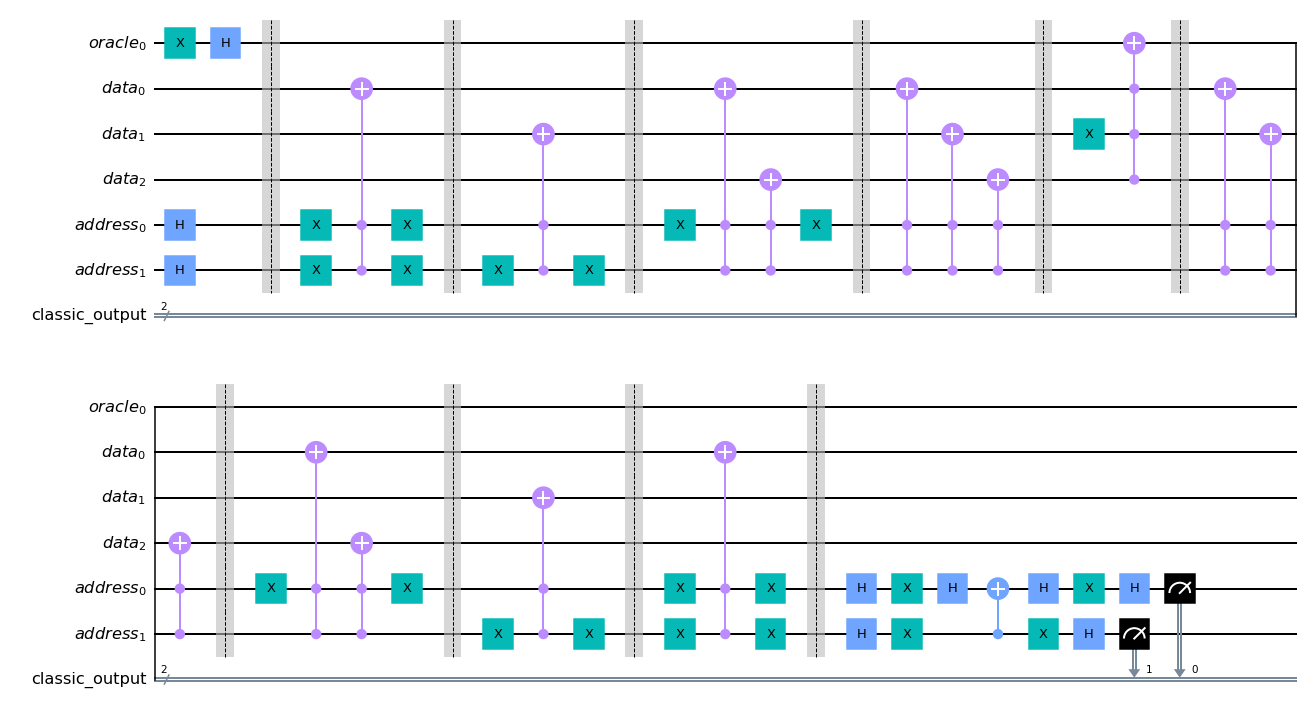

In [5]:
address = QuantumRegister(2, 'address')
data = QuantumRegister(3, 'data')
oracle = QuantumRegister(1, 'oracle')
classic = ClassicalRegister(2, 'classic_output')
qc = QuantumCircuit(address, data, oracle, c)

# address preparation
qc.h([address[0],address[1]])
qc.x(oracle[0])
qc.h(oracle[0])
qc.barrier()

##Qram part
qram(qc, address, data)

#flip phase of m = 5 (101)
qc.x(data[1])
qc.mct([data[0], data[1], data[2]], oracle[0], mode='noancilla')
qc.barrier()

## Reverse Qram part
qram_reversed(qc, address, data)


#diffusion
qc.h(address[:2])
qc.x(address[:2])
qc.h(address[1])
qc.cx(address[0], address[1])
qc.h(address[1])
qc.x(address[:2])
qc.h(address[:2])

#Measure the address
qc.measure(address[0:2], classic[0:2])

# Reverse the output string.
qc = qc.reverse_bits()

execute_circuit(qc)

qc.draw(output='mpl')